In [1]:
# Basic packages
import pandas as pd
import numpy as np

In [2]:
# Import data
url = 'https://www.cer-rec.gc.ca/open/energy/energyfutures2023/crude-oil-production-2023.csv'
df = pd.read_csv(url, header=0, index_col=0)
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year
df = df[df['Unit'] == 'Thousand Barrels per day']

# Comparison data
ab = df[df['Region'] == 'Alberta']
ab_insitu = ab[ab['Variable'] == 'In Situ Bitumen']

## 1. Matplotlib

In [3]:
# Import Statement
import matplotlib.pyplot as plt
from matplotlib import style

In [4]:
# This is also needed for pyplot to seperate out the years
cnz = ab_insitu[(ab_insitu['Scenario'] == 'Canada Net-zero') & (ab_insitu['Year'] >= 2024)]
gnz = ab_insitu[(ab_insitu['Scenario'] == 'Global Net-zero') & (ab_insitu['Year'] >= 2024)]
cm = ab_insitu[ab_insitu['Scenario'] == 'Current Measures']

[]

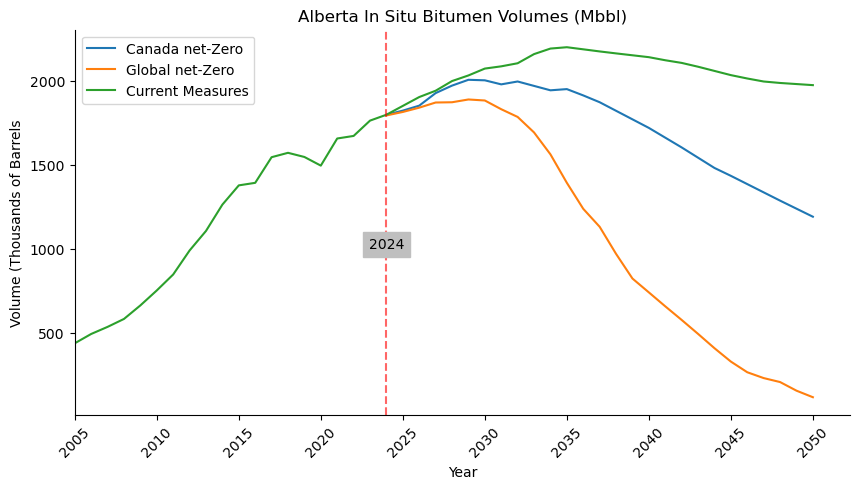

In [5]:
# Set figure and axes
fig, ax = plt.subplots(figsize=(10,5))

# Plot Data
ax.plot(cnz['Year'], cnz['Value'], label='Canada net-Zero')
ax.plot(gnz['Year'], gnz['Value'], label='Global net-Zero')
ax.plot(cm['Year'], cm['Value'], label='Current Measures')
ax.axvline(x=2024, linestyle='--', color='red', alpha=0.6)

'''
Styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

Examples:
    Solarize_Light2
    dark_background
    fivethirtyeight
    seaborn-v0_8
    
'''

# Styling
ax.set_xlim(cm['Year'].min())

ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#style.use('dark_background') # Alternatively, we can just set a style we like

plt.grid(False)
plt.text(2024, 1000, '2024', backgroundcolor='0.75', c='black', ha='center')\

# Graph labels
plt.xticks(np.arange(cm['Year'].min(), 2055, step=5), rotation=45)
plt.title()
plt.ylabel('Volume (Thousands of Barrels')
plt.xlabel('Year')
plt.legend(prop={'size': 10})

# Plot
plt.plot()

## 2. Seaborn

In [6]:
# Import Statement
import seaborn as sns

<Axes: xlabel='Year', ylabel='Value'>

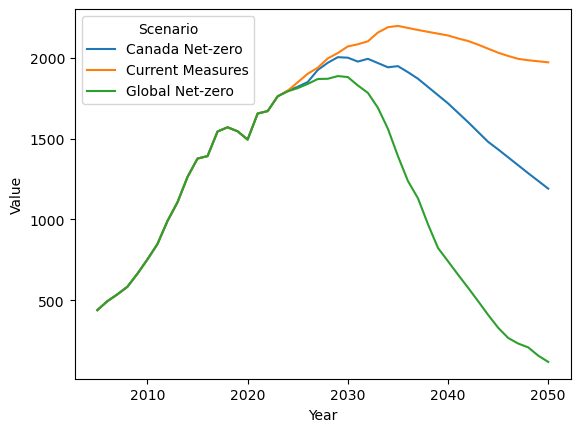

In [8]:
# Plot it
sns.lineplot(data=ab_insitu, x='Year', y='Value', hue='Scenario')

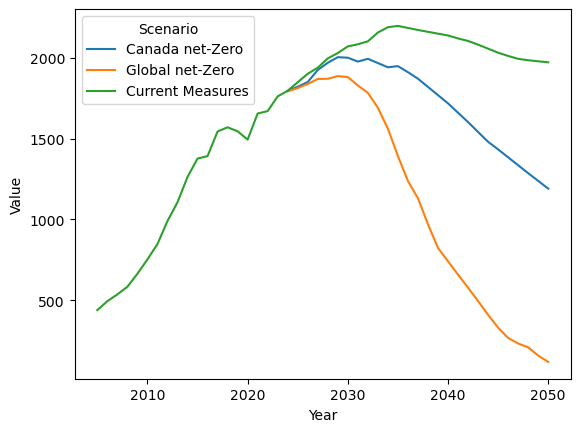

In [9]:
# Compare this to the same graph, but in pyplot
cnz = ab_insitu[(ab_insitu['Scenario'] == 'Canada Net-zero') & (ab_insitu['Year'] >= 2024)]
gnz = ab_insitu[(ab_insitu['Scenario'] == 'Global Net-zero') & (ab_insitu['Year'] >= 2024)]
cm = ab_insitu[ab_insitu['Scenario'] == 'Current Measures']

plt.plot(cnz['Year'], cnz['Value'], label='Canada net-Zero')
plt.plot(gnz['Year'], gnz['Value'], label='Global net-Zero')
plt.plot(cm['Year'], cm['Value'], label='Current Measures')

plt.ylabel('Value')
plt.xlabel('Year')
plt.legend(title='Scenario')

## 3. Plotnine

In [52]:
# Import Statements
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_smooth, ggtitle, geom_line, geom_vline, geom_text, geom_label

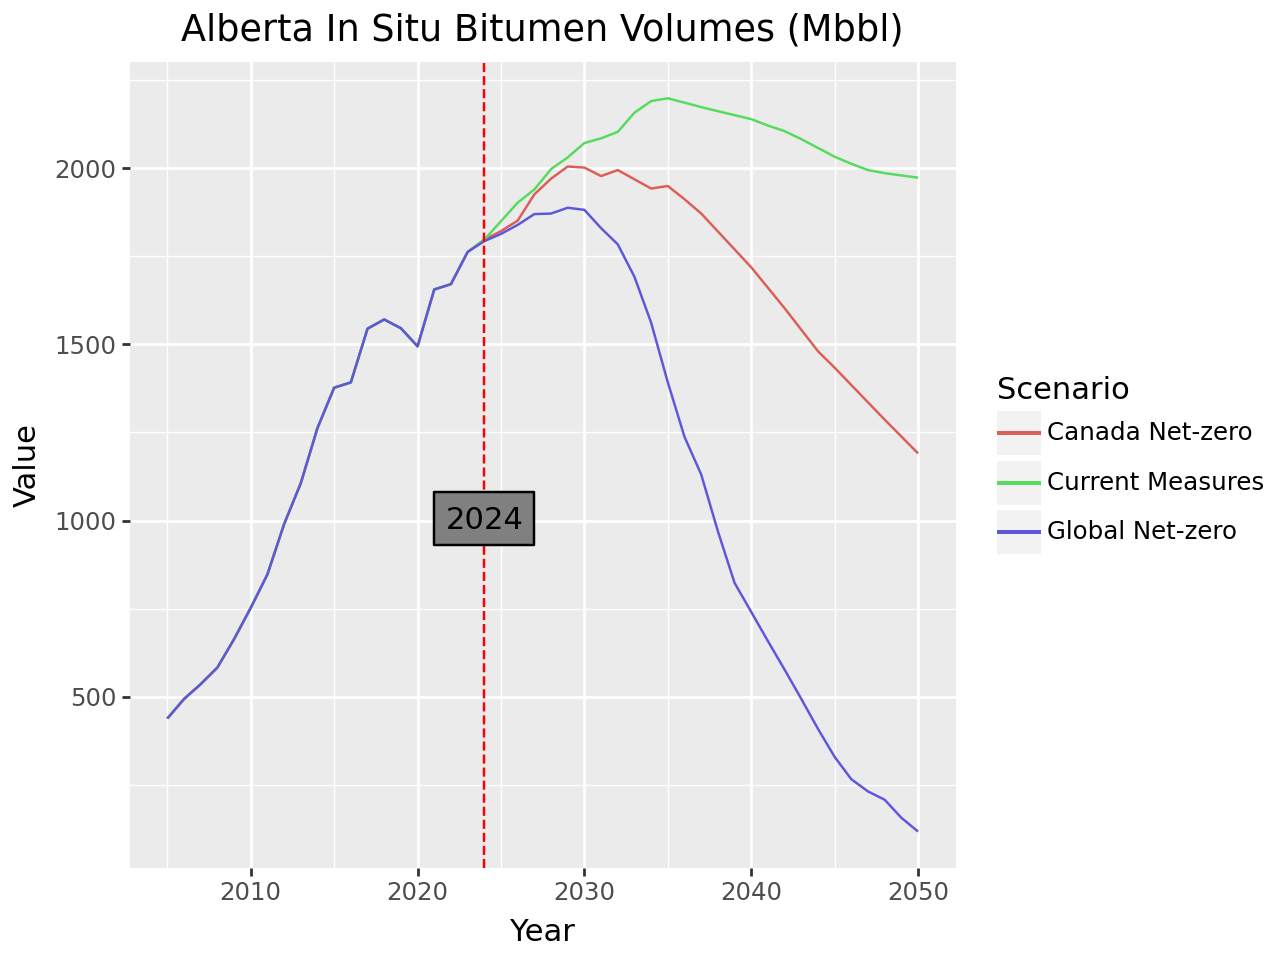

In [69]:
(    
    ggplot(ab_insitu, aes(x="Year", y="Value", color='Scenario'))
    + geom_line()
    + ggtitle("Alberta In Situ Bitumen Volumes (Mbbl)")
    + geom_vline(xintercept=2024, color='red', linetype='dashed')
    + annotate("rect", xmin = 2021, xmax = 2027, ymin = 930, ymax = 1080, color = "black", fill = "grey")
    + annotate('text', x=2024, y=1000, label='2024')
)

## 4. Plotly

In [77]:
# Import Statement
import plotly.express as px
import plotly.graph_objects as go

In [87]:
fig = px.line(ab_insitu, x='Year', y='Value', color='Scenario', 
    title='Alberta In Situ Bitumen Volumes (Mbbl)',
    labels={'Value':'Volume'}
    )

fig.show()